In [3]:
# Import Required Libraries
import glob
import random
import cv2
from matplotlib import pyplot as plt
from IPython.display import display, Markdown, Latex

In [4]:
# Set input and output paths
project_path = '/Users/sumukhiganesan/GitHub/ds5500-capstone-project/'
data_path = project_path + 'datasets/'
custom_ds_path = data_path + 'custom_dataset/'

In [5]:
images_path = custom_ds_path + 'images/train/'
labels_path = custom_ds_path + 'labels/train/'

In [6]:
ls_image_paths = glob.glob(images_path + '*')
ls_graph_paths = glob.glob(labels_path + '*')

In [41]:
sample_image_path = random.sample(ls_image_paths, 1)[0]
sample_graph_path = labels_path + sample_image_path.split('/')[-1].replace('.png', '.txt')
print(sample_image_path)

/Users/sumukhiganesan/GitHub/ds5500-capstone-project/datasets/custom_dataset/images/train/01770.png


(106, 269, 3)


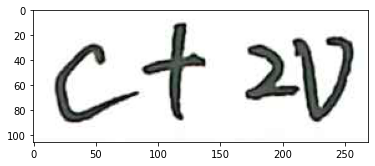

In [42]:
# Load sample image
img = cv2.imread(sample_image_path) 
print(img.shape)
plt.imshow(img)S
# plt.axis("off")
plt.show()

(504, 1280, 3)


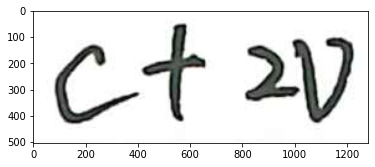

In [43]:
# Load sample image
import imutils
img_resized = imutils.resize(img, width=1280) 
print(img_resized.shape)
plt.imshow(img_resized)
# plt.axis("off")
plt.show()

(169, 295, 3)
33.3763 89.1598 51.804199999999994 151.8042
7 13 59 165
111.85565 93.41235 54.123699999999985 36.597899999999996
84 75 138 111
195.74745000000001 79.10825 48.71130000000002 23.969099999999997
171 67 220 91
260.43815 78.72165 40.463899999999995 109.79389999999998
240 23 280 133


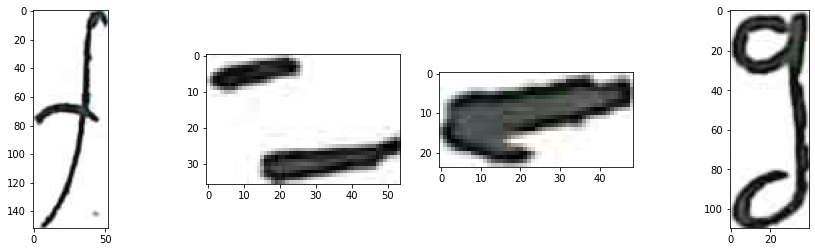

In [53]:
with open(sample_graph_path, 'r') as file:
    lines = file.readlines()

    image_height, image_width, _ = img.shape
    print(img.shape)
    num_objects = len(lines)

    fig, ax = plt.subplots(1, num_objects, figsize=(num_objects * 4, 4))

    for i, l in enumerate(lines):
        info = l.split(' ')
        x_center = float(info[1]) * image_width
        y_center = float(info[2]) * image_height
        width = float(info[3]) * image_width
        height = float(info[4]) * image_height

        print(x_center, y_center, width, height) 
        
        x_min = int(x_center - (width / 2))
        y_min = int(y_center - (height / 2))
        x_max = int(x_center + (width / 2))
        y_max = int(y_center + (height / 2))

        print(x_min, y_min, x_max, y_max)

        symbol = img[y_min:y_max, x_min:x_max]
        ax[i].imshow(symbol)